<a href="https://colab.research.google.com/github/Derrick-Majani/Mushroom-Prediction/blob/main/XGBoost_Mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
import warnings
import io
import os
import sys

### Mushroom Classification Dataset - All Categorical Features
Input Features: 'cap-shape', 'cap-surface', 'cap-color', 'bruises','odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color','stalk-shape', 'stalk-root', 'stalk-surface-above-ring','stalk-surface-below-ring', 'stalk-color-above-ring','stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'

### Target Feature:
'class_edible'

- Objective: Predict if a mushroom is edible or inedible

In [3]:
# Load Dataset.
url = 'https://raw.githubusercontent.com/ChandraLingam/AmazonSageMakerCourse/master/xgboost/MushroomClassification/mushroom_data_all.csv'
df = pd.read_csv(url)

In [4]:
df.sample(n=5)

,class_edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5126,p,c,g,w,t,n,f,w,n,w,...,s,w,w,p,w,o,p,w,c,l
2902,e,x,f,g,t,n,f,c,b,n,...,s,p,w,p,w,o,p,n,v,d
6654,p,f,s,e,f,y,f,c,n,b,...,s,p,p,p,w,o,e,w,v,l
4188,p,x,y,g,f,f,f,c,b,h,...,k,n,n,p,w,o,l,h,v,d
5318,e,x,y,n,f,n,f,w,n,w,...,f,w,n,p,w,o,e,w,v,l


In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(8124, 23)

In [7]:
df.isnull().sum()

class_edible                0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [10]:
df.describe().T

,count,unique,top,freq
class_edible,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class_edible              8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [12]:
df.columns

Index(['class_edible', 'cap-shape', 'cap-surface', 'cap-color', 'bruises',
       'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [13]:
# https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

In [14]:
# Encoding the variable
df = df.apply(lambda x: d[x.name].fit_transform(x))

In [15]:
df.head()

,class_edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [21]:
for key in d.keys():
    print(key, d[key].classes_)

class_edible ['e' 'p']
cap-shape ['b' 'c' 'f' 'k' 's' 'x']
cap-surface ['f' 'g' 's' 'y']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment ['a' 'f']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape ['e' 't']
stalk-root ['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring ['f' 'k' 's' 'y']
stalk-surface-below-ring ['f' 'k' 's' 'y']
stalk-color-above-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type ['p']
veil-color ['n' 'o' 'w' 'y']
ring-number ['n' 'o' 't']
ring-type ['e' 'f' 'l' 'n' 'p']
spore-print-color ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']


In [22]:
d.keys()

dict_keys(['class_edible', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'])

In [23]:
df['class_edible'].value_counts()

0    4208
1    3916
Name: class_edible, dtype: int64

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
Diabetic = df[(df['class_edible'] != 0)]
Non_diabetic = df[(df['class_edible'] == 0)]


def target_count():
    trace = go.Bar( x = df['class_edible'].value_counts().values.tolist(), 
                    y = ['Non_diabetic','diabetic' ], 
                    orientation = 'h', 
                    text=df['class_edible'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'gold'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'class_edible')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [25]:
df.to_csv('mushroom_encoded_all.csv'
                          ,index=False)

### Training and Validation Set
### Target Variable as first column followed by input features:
'class_edible', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'

### Training, Validation files do not have a column header

In [26]:
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the datset
np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.iloc[l]

In [27]:
rows = df.shape[0]
train = int(.7 * rows)
test = rows-train

In [28]:
rows, train, test

(8124, 5686, 2438)

In [30]:
columns = ['class_edible', 'cap-shape', 'cap-surface', 'cap-color', 'bruises',
       'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

In [31]:
# Write Training Set
df[:train].to_csv('mushroom_train.csv'
                          ,index=False,index_label='Row',header=False
                          ,columns=columns)

In [33]:
# Write Validation Set
df[train:].to_csv('mushroom_validation.csv'
                          ,index=False,index_label='Row',header=False
                          ,columns=columns)

In [34]:
# Write Column List
with open('mushroom_train_column_list.txt','w') as f:
    f.write(','.join(columns))

### Train a model with Mushroom data using XGBoost algorithm
- Model is trained with XGBoost installed in notebook instance
- In the later examples, we will train using SageMaker's XGBoost algorithm

In [35]:
# Install xgboost in notebook instance.
#### Command to install xgboost
!pip install xgboost==1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 148.9 MB 34 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [37]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
column_list_file = 'mushroom_train_column_list.txt'
train_file = 'mushroom_train.csv'
validation_file = 'mushroom_validation.csv'

In [39]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [40]:
columns

['class_edible',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [41]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [42]:
df_train.head()

,class_edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,0,1,2,1,0,0,3,...,0,7,7,0,2,1,4,1,3,1
1,1,3,3,4,0,7,1,0,1,0,...,1,6,6,0,2,1,0,7,4,0
2,1,2,3,9,0,2,1,0,0,2,...,1,6,6,0,2,1,2,1,4,1
3,0,0,3,8,1,0,1,0,0,10,...,2,7,7,0,2,1,4,2,2,3
4,0,5,3,2,1,5,1,0,0,7,...,2,6,3,0,2,1,4,2,4,0


In [43]:
df_validation.head()

,class_edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,2,0,8,0,5,1,1,0,7,...,2,7,7,0,2,1,0,2,0,1
1,0,5,2,3,0,5,1,1,0,5,...,2,7,7,0,2,1,0,3,3,1
2,0,5,0,8,0,5,1,1,0,4,...,2,7,7,0,2,1,0,2,0,1
3,0,5,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,4,2
4,0,5,3,3,1,5,1,0,0,5,...,2,6,6,0,2,1,4,3,5,0


In [44]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [45]:
X_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,0,1,2,1,0,0,3,1,...,0,7,7,0,2,1,4,1,3,1
1,3,3,4,0,7,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,0
2,2,3,9,0,2,1,0,0,2,0,...,1,6,6,0,2,1,2,1,4,1
3,0,3,8,1,0,1,0,0,10,0,...,2,7,7,0,2,1,4,2,2,3
4,5,3,2,1,5,1,0,0,7,1,...,2,6,3,0,2,1,4,2,4,0


In [47]:
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [48]:
# Launch a classifier
# XGBoost Training Parameter Reference: 
#   https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
#classifier = xgb.XGBClassifier (objective='binary:logistic',n_estimators=50)
classifier = xgb.XGBClassifier (objective='binary:logistic')

In [49]:
classifier

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [50]:
classifier.fit(X_train,
               y_train,
               eval_set = [(X_train, y_train), (X_validation, y_validation)], 
               eval_metric=['logloss'])

[0]	validation_0-logloss:0.44414	validation_1-logloss:0.44445
[1]	validation_0-logloss:0.30564	validation_1-logloss:0.30641
[2]	validation_0-logloss:0.21465	validation_1-logloss:0.21545
[3]	validation_0-logloss:0.15405	validation_1-logloss:0.15500
[4]	validation_0-logloss:0.11200	validation_1-logloss:0.11277
[5]	validation_0-logloss:0.08241	validation_1-logloss:0.08331
[6]	validation_0-logloss:0.06134	validation_1-logloss:0.06207
[7]	validation_0-logloss:0.04607	validation_1-logloss:0.04666
[8]	validation_0-logloss:0.03465	validation_1-logloss:0.03513
[9]	validation_0-logloss:0.02635	validation_1-logloss:0.02688
[10]	validation_0-logloss:0.02031	validation_1-logloss:0.02076
[11]	validation_0-logloss:0.01528	validation_1-logloss:0.01563
[12]	validation_0-logloss:0.01158	validation_1-logloss:0.01186
[13]	validation_0-logloss:0.00891	validation_1-logloss:0.00911
[14]	validation_0-logloss:0.00703	validation_1-logloss:0.00722
[15]	validation_0-logloss:0.00566	validation_1-logloss:0.00582
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
eval_result = classifier.evals_result()

In [52]:
training_rounds = range(len(eval_result['validation_0']['logloss']))

In [53]:

print(training_rounds)

range(0, 100)


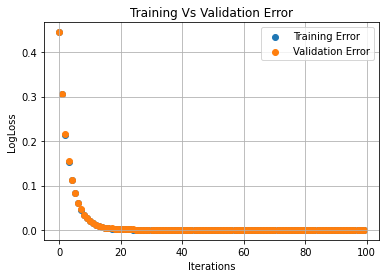

In [54]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['logloss'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['logloss'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('LogLoss')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

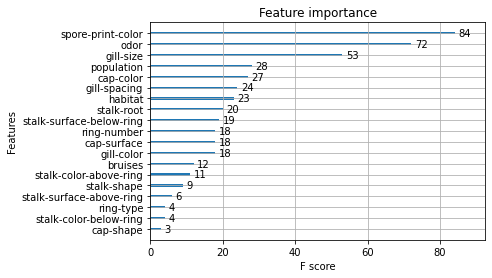

In [55]:
xgb.plot_importance(classifier)
plt.show()

In [57]:
df = pd.read_csv(validation_file,names=columns)
df.head()

,class_edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,2,0,8,0,5,1,1,0,7,...,2,7,7,0,2,1,0,2,0,1
1,0,5,2,3,0,5,1,1,0,5,...,2,7,7,0,2,1,0,3,3,1
2,0,5,0,8,0,5,1,1,0,4,...,2,7,7,0,2,1,0,2,0,1
3,0,5,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,4,2
4,0,5,3,3,1,5,1,0,0,5,...,2,6,6,0,2,1,4,3,5,0


In [58]:
X_test = df.iloc[:,1:]

In [60]:
result = classifier.predict(X_test)

In [61]:
result[:5]

array([0, 0, 0, 0, 0])

In [62]:
df['predicted_class'] = result

In [63]:
df.head()

,class_edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,predicted_class
0,0,2,0,8,0,5,1,1,0,7,...,7,7,0,2,1,0,2,0,1,0
1,0,5,2,3,0,5,1,1,0,5,...,7,7,0,2,1,0,3,3,1,0
2,0,5,0,8,0,5,1,1,0,4,...,7,7,0,2,1,0,2,0,1,0
3,0,5,2,4,0,5,0,0,0,5,...,5,5,0,1,1,4,0,4,2,0
4,0,5,3,3,1,5,1,0,0,5,...,6,6,0,2,1,4,3,5,0,0


In [64]:
df.class_edible.value_counts()

0    1243
1    1195
Name: class_edible, dtype: int64

In [65]:
df.predicted_class.value_counts()

0    1243
1    1195
Name: predicted_class, dtype: int64

## Binary Classifier Metrics

In [67]:
# Reference: https://scikit-learn.org/stable/modules/model_evaluation.html
# Explicitly stating labels. Pass=1, Fail=0
def true_positive(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[0, 0]

def true_negative(y_true, y_pred): 
    return confusion_matrix(y_true,y_pred,labels=[1,0])[1, 1]

def false_positive(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[1, 0]

def false_negative(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,0])[0, 1]

In [68]:
# Compute Binary Classifier Metrics
# Returns a dictionary {"MetricName":Value,...}

def binary_classifier_metrics(y_true, y_pred):
    metrics = {}

    # References: 
    #  https://docs.aws.amazon.com/machine-learning/latest/dg/binary-classification.html
    #  https://en.wikipedia.org/wiki/Confusion_matrix
    
    # Definition:
    # true positive = tp = how many samples were correctly classified as positive (count)
    # true negative = tn = how many samples were correctly classified as negative (count)
    # false positive = fp = how many negative samples were mis-classified as positive (count)
    # false_negative = fn = how many positive samples were mis-classified as negative (count)
    
    # positive = number of positive samples (count)
    #          = true positive + false negative
    # negative = number of negative samples (count)
    #          = true negative + false positive
    
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    
    positive = tp + fn
    negative = tn + fp
    
    metrics['TruePositive'] = tp
    metrics['TrueNegative'] = tn
    metrics['FalsePositive'] = fp
    metrics['FalseNegative'] = fn
    
    metrics['Positive'] = positive
    metrics['Negative'] = negative
    
    # True Positive Rate (TPR, Recall) = true positive/positive
    # How many positives were correctly classified? (fraction)
    # Recall value closer to 1 is better. closer to 0 is worse
    if tp == 0:
        recall = 0
    else:
        recall = tp/positive
        
    metrics['Recall'] = recall
    
    # True Negative Rate = True Negative/negative
    # How many negatives were correctly classified? (fraction)
    # True Negative Rate value closer to 1 is better. closer to 0 is worse
    if tn == 0:
        tnr = 0
    else:
        tnr = tn/(negative)
    metrics['TrueNegativeRate'] = tnr
    
    # Precision = True Positive/(True Positive + False Positive)
    # How many positives classified by the algorithm are really positives? (fraction)
    # Precision value closer to 1 is better. closer to 0 is worse
    if tp == 0:
        precision = 0
    else:
        precision = tp/(tp + fp)
    metrics['Precision'] = precision
    
    # Accuracy = (True Positive + True Negative)/(total positive + total negative)
    # How many positives and negatives were correctly classified? (fraction)
    # Accuracy value closer to 1 is better. closer to 0 is worse
    accuracy = (tp + tn)/(positive + negative)
    metrics['Accuracy'] = accuracy
    
    # False Positive Rate (FPR, False Alarm) = False Positive/(total negative)
    # How many negatives were mis-classified as positives (fraction)
    # False Positive Rate value closer to 0 is better. closer to 1 is worse
    if fp == 0:
        fpr = 0
    else:
        fpr = fp/(negative)
    metrics['FalsePositiveRate'] = fpr
    
    # False Negative Rate (FNR, Misses) = False Negative/(total Positive)
    # How many positives were mis-classified as negative (fraction)
    # False Negative Rate value closer to 0 is better. closer to 1 is worse
    fnr = fn/(positive)
    metrics['FalseNegativeRate'] = fnr
    
    # F1 Score = harmonic mean of Precision and Recall
    # F1 Score closer to 1 is better. Closer to 0 is worse.
    if precision == 0 or recall == 0:
        f1 = 0
    else:        
        f1 = 2*precision*recall/(precision+recall)

    metrics['F1'] = f1
    
    return metrics

In [69]:
# Reference: 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [70]:
# Compute confusion matrix
#{0:'edible',1:'poisonous'})
cnf_matrix = confusion_matrix(df['class_edible'], df['predicted_class'],labels=[1,0])

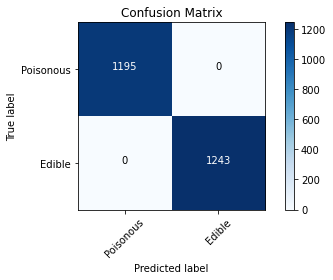

In [71]:
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Poisonous','Edible'],
                      title='Confusion Matrix')

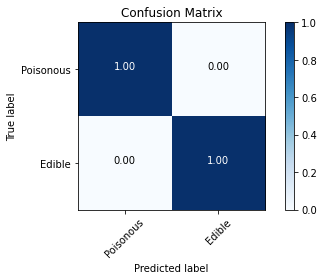

In [72]:
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Poisonous','Edible'],
                      title='Confusion Matrix',normalize=True)

In [73]:
metrics = [binary_classifier_metrics(df['class_edible'], df['predicted_class'])]
df_metrics=pd.DataFrame.from_dict(metrics)
df_metrics.index = ['Model']

In [74]:
df_metrics

,TruePositive,TrueNegative,FalsePositive,FalseNegative,Positive,Negative,Recall,TrueNegativeRate,Precision,Accuracy,FalsePositiveRate,FalseNegativeRate,F1
Model,1195,1243,0,0,1195,1243,1.0,1.0,1.0,1.0,0,0.0,1.0


In [75]:
print('Counts')
print(df_metrics[['TruePositive',
                  'FalseNegative',
                  'FalsePositive',
                  'TrueNegative',]].round(2))
print()
print('Fractions')
print(df_metrics[['Recall',
                  'FalseNegativeRate',
                  'FalsePositiveRate',
                  'TrueNegativeRate',]].round(2))
print()

print(df_metrics[['Precision',
                  'Accuracy',
                  'F1']].round(2))

Counts
       TruePositive  FalseNegative  FalsePositive  TrueNegative
Model          1195              0              0          1243

Fractions
       Recall  FalseNegativeRate  FalsePositiveRate  TrueNegativeRate
Model     1.0                0.0                  0               1.0

       Precision  Accuracy   F1
Model        1.0       1.0  1.0


In [76]:
print(classification_report(
    df['class_edible'],
    df['predicted_class'],
    labels=[1,0],
    target_names=['Poisonous','Edible']))

              precision    recall  f1-score   support

   Poisonous       1.00      1.00      1.00      1195
      Edible       1.00      1.00      1.00      1243

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

